In this first example, we will explore a simulated lightcurve that follows a damped random walk, which is often used to model variability in the optical flux of quasar.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from astroML.time_series import lomb_scargle, generate_damped_RW
from astroML.time_series import ACF_scargle,ACF_EK

C:\Users\jcald\Anaconda2\lib\site-packages\astroML\time_series\periodogram.py:8: UserWarning: Using slow version of lomb_scargle. Install astroML_addons to use an optimized version
  warnings.warn("Using slow version of lomb_scargle. Install astroML_addons "


Use the numpy.arange method to generate 1000 days of data. 

In [4]:
tdays = np.arange(0, 1E3)
z = 2.0 # redshift
tau = 300 # damping timescale

Use the help function to figure out how to generate a dataset of this evenly spaced damped random walk over the 1000 days. 

In [6]:
help(generate_damped_RW)

Help on function generate_damped_RW in module astroML.time_series.generate:

generate_damped_RW(t_rest, tau=300.0, z=2.0, xmean=0, SFinf=0.3, random_state=None)
    Generate a damped random walk light curve
    
    This uses a damped random walk model to generate a light curve similar
    to that of a QSO [1]_.
    
    Parameters
    ----------
    t_rest : array_like
        rest-frame time.  Should be in increasing order
    tau : float
        relaxation time
    z : float
        redshift
    xmean : float (optional)
        mean value of random walk; default=0
    SFinf : float (optional
        Structure function at infinity; default=0.3
    random_state : None, int, or np.random.RandomState instance (optional)
        random seed or random number generator
    
    Returns
    -------
    x : ndarray
        the sampled values corresponding to times t_rest
    
    Notes
    -----
    The differential equation is (with t = time/tau):
    
        dX = -X(t) * dt + sigma * sqrt

In [64]:
data=generate_damped_RW(tdays,tau=tau,z=z);

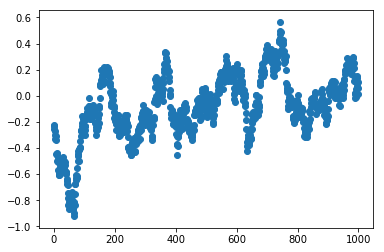

In [65]:
plt.scatter(tdays,data)
plt.show()

Add errors to your 1000 points using numpy.random.normal.  Note, you will need 1000 points, each centered on the actual data point, and assume a sigma 0.1. 

In [66]:
data+=np.random.normal(loc=0.0,scale=0.1,size=1000)

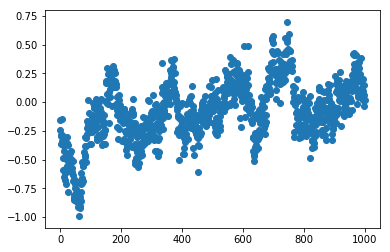

In [67]:
plt.scatter(tdays,data)
plt.show()

Randomly select a subsample of 200 data points from your generated dataset.  This is now *unevenly* spaced, and will serve as your observed lightcurve.

In [82]:
idx=np.sort(np.random.choice(1000,200,replace=False))
sample=data[idx]
times=tdays[idx]

Plot the observed lightcurve.

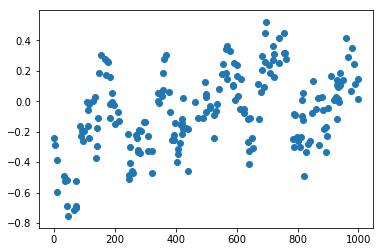

In [83]:
plt.scatter(times,sample)
plt.show()

Use the help menu to figure out how to calculate the autocorrelation function of your lightcurve with ACF_scargle.  

In [85]:
ACF_scargle(times,sample,0.1)

(array([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 array([-32.2013247 , -32.16987809, -32.13843149, ...,  32.10698488,
         32.13843149,  32.16987809]))

In [100]:
res_EK=ACF_EK(times,sample,0.1,bins=100)

In [74]:
help(ACF_EK)

Help on function ACF_EK in module astroML.time_series.ACF:

ACF_EK(t, y, dy, bins=20)
    Auto-correlation function via the Edelson-Krolik method
    
    Parameters
    ----------
    t : array_like
        times of observation.  Assumed to be in increasing order.
    y : array_like
        values of each observation.  Should be same shape as t
    dy : float or array_like
        errors in each observation.
    bins : int or array_like (optional)
        if integer, the number of bins to use in the analysis.
        if array, the (nbins + 1) bin edges.
        Default is bins=20.
    
    Returns
    -------
    ACF : ndarray
        The auto-correlation function and associated times
    err : ndarray
        the error in the ACF
    bins : ndarray
        bin edges used in computation



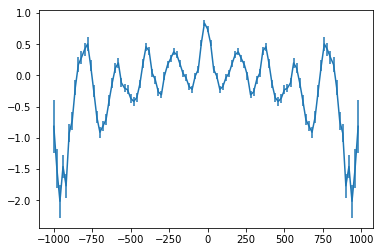

In [101]:
plt.errorbar(res_EK[2][:-1],res_EK[0],yerr=res_EK[1])
plt.show()

In [102]:
res_EK_full=ACF_EK(tdays,data,0.1,bins=100)

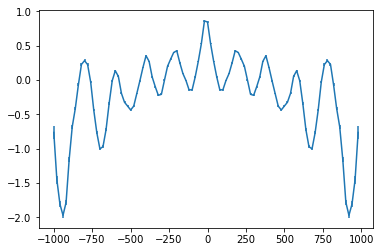

In [104]:
plt.errorbar(res_EK_full[2][:-1],res_EK_full[0],yerr=res_EK_full[1])
plt.show()

interesting behaviour... what if we do this many, many times?

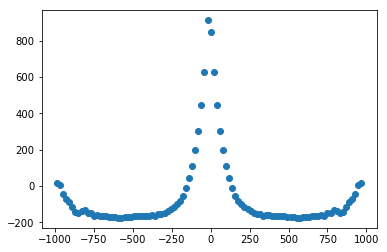

In [7]:
acf=np.zeros(100)
for i in range(1000):
    data=generate_damped_RW(tdays,tau=tau,z=z);
    data+=np.random.normal(loc=0.0,scale=0.1,size=1000)
    idx=np.sort(np.random.choice(1000,200,replace=False))
    sample=data[idx]
    times=tdays[idx]
    res_EK=ACF_EK(times,sample,0.1,bins=100)
    acf+=res_EK[0]

plt.scatter(res_EK[2][:-1],acf)
plt.show()

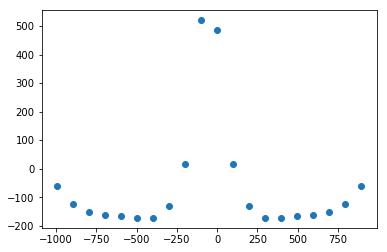

In [5]:
bins=20
acf=np.zeros(bins)
for i in range(1000):
    data=generate_damped_RW(tdays,tau=tau,z=z);
    data+=np.random.normal(loc=0.0,scale=0.1,size=1000)
    idx=np.sort(np.random.choice(1000,200,replace=False))
    sample=data[idx]
    times=tdays[idx]
    res_EK=ACF_EK(times,sample,0.1,bins=bins)
    acf+=res_EK[0]

plt.scatter(res_EK[2][:-1],acf)
plt.show()

In this next example, we will explore data drawn from a gaussian process.

In [10]:
from sklearn.gaussian_process import GaussianProcess

Define a covariance function as the one dimensional squared-exponential covariance function described in class.  This will be a function of x1, x2, and the bandwidth h.  Name this function covariance_squared_exponential. 

Generate values for the x-axis as 1000 evenly points between 0 and 10 using numpy.linspace. Define a bandwidth of h=1.

Generate an output of your covariance_squared_exponential with x as x1, x[:,None] as x2, and h as the bandwidth.

Use numpy.random.multivariate_normal to generate a numpy array of the same length as your x-axis points. Each point is centered on 0 (your mean is a 1-d array of zeros), and your covariance is the output of your covariance_squared_exponential above.

Choose two values in your x-range as sample x values, and put in an array, x_sample_test.  Choose a function (e.g. numpy.cos) as your example function to constrain.

Define an instance of a gaussian proccess

In [11]:
gp = GaussianProcess(corr='squared_exponential', theta0=0.5,
                      random_state=0)

Fit the Gaussian process to data x1[:,None], with the output of the function on your sample x values (e.g. numpy.cos(x_sample_test) ).

Predict on x1[:,None], and get the MSE values.  Plot the output function and function errors.